# Lesson 3 Assignment - Wine Classifier

## Author - Connor Higgins

### Instructions
Your task for this assignment:  Design a simple, low-cost sensor that can distinguish between red wine and white wine.
Your sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.

Your technology is capable of sensing the following wine attributes:
- Fixed acidity  
- Free sulphur dioxide
- Volatile acidity  
- Total sulphur dioxide
- Citric acid  
- Sulphates
- Residual sugar  
- pH
- Chlorides  
- Alcohol
- Density




## Tasks
1. Read <a href="https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WineQuality.pdf">WineQuality.pdf</a>.
2. Use the RedWhiteWine.csv or RedWhiteWine.arff that is provided.
Note: If needed, remove the quality attribute, which you will not need for this assignment.
3. Build an experiment using Naive Bayes Classifier.

Answer the following questions:
1. What is the percentage of correct classification results (using all attributes)?
2. What is the percentage of correct classification results (using a subset of the attributes)?
3. What is the AUC of your model?
4. What is the best AUC that you can achieve?
5. Which are the the minimum number of attributes? Why?


### Importing Data

In [1]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating DataFrame
df = pd.read_csv(URL).drop('quality', axis=1)
print(f"Entries: {df.shape[0]} | Features: {df.shape[1]}")
df.head()

Entries: 6497 | Features: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


### Summary Statistics

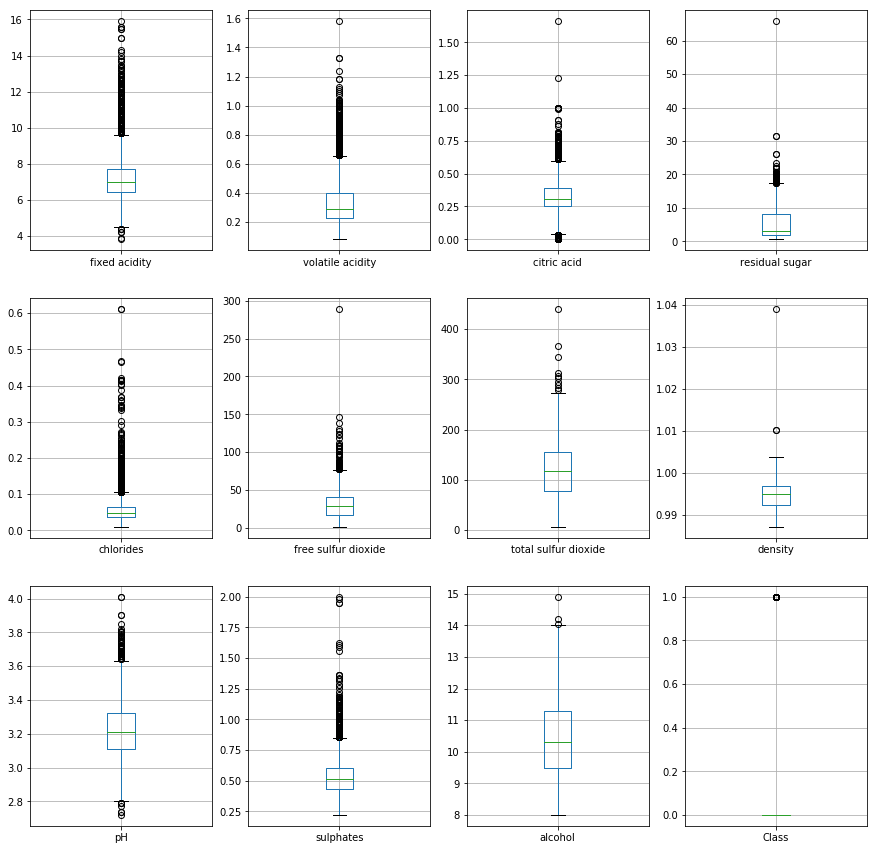

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [4]:
# Plotting Histograms and printing Summary Statistics for all attributes
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,15), grid=True)
plt.show()
df.describe()

### Creating Initial Model

In [5]:
from sklearn.model_selection import train_test_split

# Creating Features and Target arrays.
features = df.drop('Class', axis=1).values
target = df['Class'].values

# Splitting Dataset into Train (80%) and Test (20%) portions.
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.20, random_state=42
    )

print(f"X_train shape : {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_test shape : {X_test.shape} | y_test shape: {y_test.shape}")

X_train shape : (5197, 11) | y_train shape: (5197,)
X_test shape : (1300, 11) | y_test shape: (1300,)


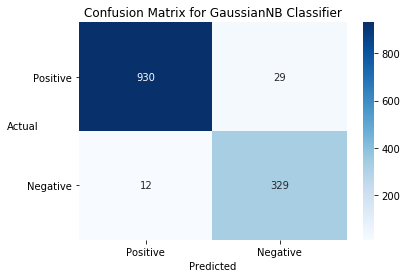

ACC Score: 0.9684615384615385


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Applying Gaussian Naive Bayes Classifier to training set.
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

# Obtaining Accuracy Score and Confusion Matrix.
acc_score = accuracy_score(y_test, y_pred, normalize=True)
conf_mat = confusion_matrix(y_test, y_pred)

def confusion_matrix_heatmap(confusion_matrix, label='Classifier'):
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual', rotation=0)
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'], rotation=0)
    ax.set_title(f'Confusion Matrix for {label}')
    plt.show()

confusion_matrix_heatmap(conf_mat, label='GaussianNB Classifier')
print(f'ACC Score: {acc_score}')

#### 1. What is the percentage of correct classification results (using all attributes)?

Overall, the initial model using all features was 96.85% accurate: remarkably good, given the model's simplicity.

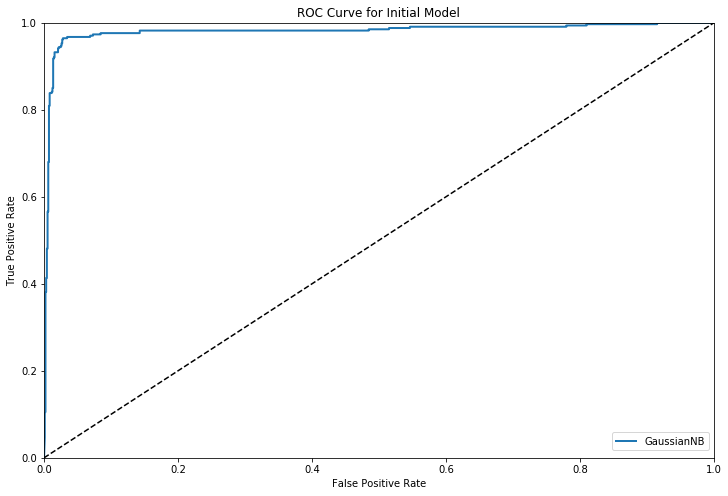

AUC Score: 0.9810454438427124


In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plotting ROC curve and obtaiing AUC score for test set.
y_scores = gnb_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

def plot_roc_curve(fpr, tpr, label='', title='ROC Curve(s)', legend=False, legloc_h=1, legloc_v=0.07):
    plt.plot(fpr, tpr, linewidth=2, label=f'{label}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    if legend:
        plt.legend(bbox_to_anchor=(legloc_h, legloc_v), ncol=5)

plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr, 'GaussianNB', 'ROC Curve for Initial Model', legend=True)
plt.show()

auc_score = roc_auc_score(y_test, y_scores[:,1])
print(f'AUC Score: {auc_score}')

#### 2. What is the AUC of your model?
The initial model received an AUC Score of 0.981, as demonstrated in the above plot. 

### Follow-up Models - Testing different Feature Subsets

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,ACC Score,AUC Score
8,1,1,1,1,1,1,1,1,1,1,0,0.967692,0.981087
9,1,1,1,1,1,1,1,1,1,1,1,0.968462,0.981045
7,1,1,1,1,1,1,1,1,1,0,0,0.960769,0.979073
48,0,0,0,0,0,0,1,1,1,1,1,0.946923,0.977659
17,0,1,1,1,1,1,1,1,1,1,0,0.963846,0.977631
18,0,1,1,1,1,1,1,1,1,1,1,0.963846,0.977564
6,1,1,1,1,1,1,1,1,0,0,0,0.958462,0.977452
47,0,0,0,0,0,0,1,1,1,1,0,0.946154,0.977209
39,0,0,0,0,1,1,1,1,1,1,1,0.950769,0.975587
38,0,0,0,0,1,1,1,1,1,1,0,0.949231,0.975446


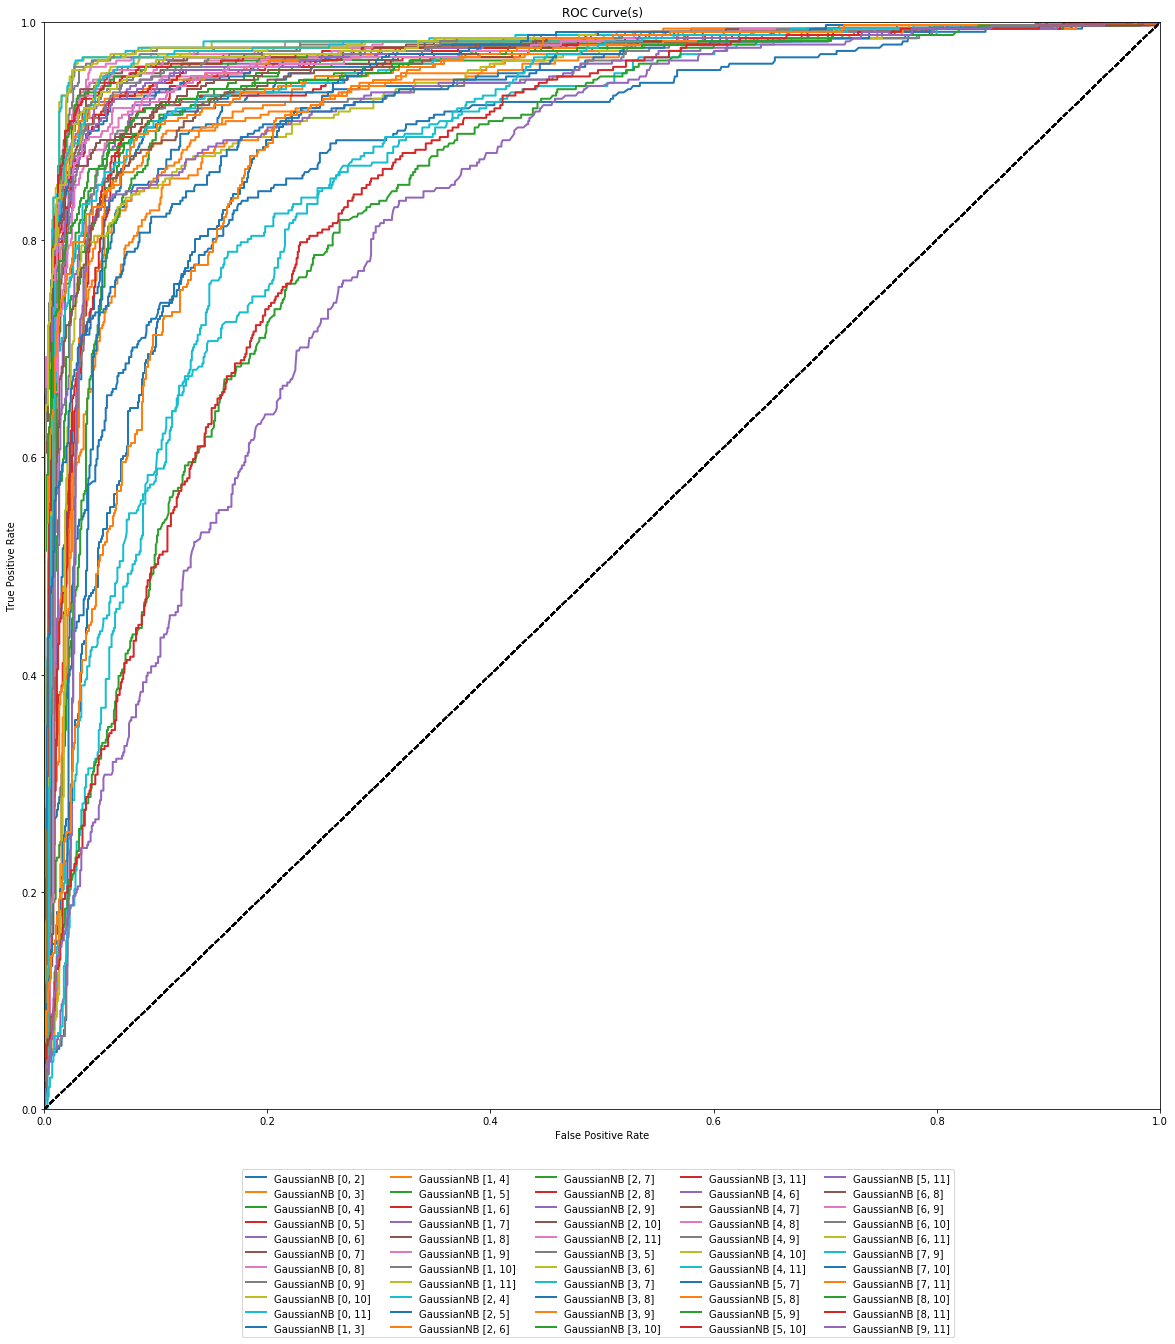

In [8]:
from sklearn.utils.extmath import cartesian

# Creating list of all possible combinations of features using index slices.
indexlist = [x for x in range(X_train.shape[1] + 1)]
uncleanslices = cartesian((indexlist, indexlist))
slices = [list(x) for x in uncleanslices if x[1] - x[0] > 1]

# Applying GaussianNB classifier, plotting ROC Curve, and obtaining AUC/ACC scores for each combination of features.
feature_arrays = []
acc_scores = []
auc_scores = []
plt.figure(figsize=(20,20))
for i in slices:
    feature_list = [1 if x in range(i[0], i[1]) else 0 for x in range(11)]
    feature_arrays.append(np.array(feature_list))
    gnb_model = gnb.fit(X_train[:, i[0]:i[1]], y_train)
    y_pred = gnb_model.predict(X_test[:, i[0]:i[1]])
    acc_score = accuracy_score(y_test, y_pred, normalize=True)
    acc_scores.append(acc_score)
    y_scores = gnb_model.predict_proba(X_test[:, i[0]:i[1]])
    auc_score = roc_auc_score(y_test, y_scores[:,1])
    auc_scores.append(auc_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    plot_roc_curve(fpr, tpr, f'GaussianNB {i}', legend=True, legloc_h=0.82, legloc_v=-0.05)

# Compiling results in a dataframe: df_results.
dfcols = list(df.columns)
dfcols.remove('Class')
feature_array = np.vstack(feature_arrays)
df_results = pd.DataFrame(data = feature_arrays, columns = dfcols)
df_results['ACC Score'] = pd.Series(acc_scores)
df_results['AUC Score'] = pd.Series(auc_scores)

df_results.sort_values('AUC Score', ascending=False)

#### 3. What is the percentage of correct classification results (using a subset of the attributes)?
As a follow-up to the initial model, various feature subsets were tested using the Gaussian Naive Bayes Classifier. The results of these tests are listed in the above table and associated ROC Curve plot. Below are the summary statistics for both AUC Score and ACC Score.

Overall, the average ACC score for the 55 feature subset tests was 93.77%, with a high of 96.84% and a low of 77.38%. As our sensor must correctly distinguish between red and white wine 95% of the time, only 15 of the 55 subset tests meet the necessary criteria.

#### 4. What is the best AUC that you can achieve?
Of the tests conducted, the best AUC score was 0.981. For this particular test, all features were used except for 'Alcohol'. The addition of this feature slightly decreases the test's AUC score while increasing the ACC score, as in the case with the next best model, the initial model. 

The average AUC score for the 55 feature subset tests was 0.966 with a low of 0.820.

#### 5. Which are the the minimum number of attributes? Why?
Given the sensor accuracy criterion of 95%, one can only choose a model with an ACC Score greater than or equal to 0.95. This leaves 15 options: of these, the test with the minimum number of attributes was test #31 with 6 features (residual sugar,	chlorides, free sulfur dioxide, total sulfur dioxide, density, and pH). This test just meets our criterion with an ACC score of 0.950 and an AUC score of 0.969.

In [9]:
df_results[['AUC Score', 'ACC Score']].describe()

,AUC Score,ACC Score
count,55.000000,55.000000
mean,0.948705,0.916182
std,0.037208,0.049961
min,0.820238,0.773846
25%,0.934978,0.903846
50%,0.966451,0.937692
75%,0.973109,0.950000
max,0.981087,0.968462
